<a href="https://colab.research.google.com/github/bluestarleo/VSTO-Project/blob/master/DEMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Double Exponential Moving Average (DEMA)
#this programe uses the DEMA to determine when to buy or sell stock
#import the libaries/module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#to give plot the a style
plt.style.use('fivethirtyeight')


In [ ]:
#load the stock data
from google.colab import files
files.upload()

Saving AMZN.csv to AMZN.csv


{'AMZN.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2020-01-17,1885.890015,1886.640015,1857.250000,1864.719971,1864.719971,3997300\n2020-01-21,1865.000000,1894.270020,1860.000000,1892.000000,1892.000000,3707800\n2020-01-22,1896.089966,1902.500000,1883.339966,1887.459961,1887.459961,3216300\n2020-01-23,1885.109985,1889.979980,1872.760010,1884.579956,1884.579956,2484600\n2020-01-24,1891.369995,1894.989990,1847.439941,1861.640015,1861.640015,3766200\n2020-01-27,1820.000000,1841.000000,1815.339966,1828.339966,1828.339966,3528500\n2020-01-28,1840.500000,1858.109985,1830.020020,1853.250000,1853.250000,2808000\n2020-01-29,1864.000000,1874.750000,1855.020020,1858.000000,1858.000000,2088000\n2020-01-30,1858.000000,1872.869995,1850.609985,1870.680054,1870.680054,6327400\n2020-01-31,2051.469971,2055.719971,2002.270020,2008.719971,2008.719971,15567300\n2020-02-03,2010.599976,2048.500000,2000.250000,2004.199951,2004.199951,5899100\n2020-02-04,2029.880005,2059.800049,2015.369995,2049.669922,20

In [ ]:
#to store the data into DataFrame
df=pd.read_csv('AMZN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-17,1885.890015,1886.640015,1857.250000,1864.719971,1864.719971,3997300
1,2020-01-21,1865.000000,1894.270020,1860.000000,1892.000000,1892.000000,3707800
2,2020-01-22,1896.089966,1902.500000,1883.339966,1887.459961,1887.459961,3216300
3,2020-01-23,1885.109985,1889.979980,1872.760010,1884.579956,1884.579956,2484600
4,2020-01-24,1891.369995,1894.989990,1847.439941,1861.640015,1861.640015,3766200


In [ ]:
#set the date as the index
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2020-01-17,2020-01-17,1885.890015,1886.640015,1857.250000,1864.719971,1864.719971,3997300
2020-01-21,2020-01-21,1865.000000,1894.270020,1860.000000,1892.000000,1892.000000,3707800
2020-01-22,2020-01-22,1896.089966,1902.500000,1883.339966,1887.459961,1887.459961,3216300
2020-01-23,2020-01-23,1885.109985,1889.979980,1872.760010,1884.579956,1884.579956,2484600
2020-01-24,2020-01-24,1891.369995,1894.989990,1847.439941,1861.640015,1861.640015,3766200


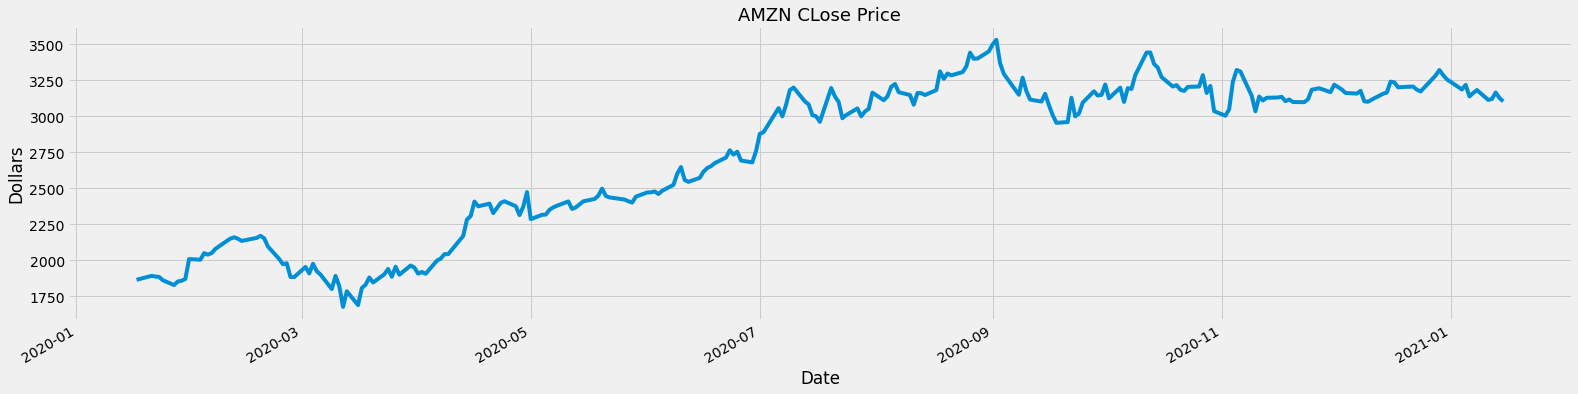

In [ ]:
#visually show the close price
df['Close'].plot(figsize=(24,6))
plt.title('AMZN CLose Price',fontsize=18)
plt.ylabel('Dollars')
plt.xlabel('Date')
plt.show()

In [ ]:
#create a function to calculate the DEMA
def DEMA(data,time_period,column):
  #calculate the Exponential Moving Average for some period
  EMA=data[column].ewm(span=time_period,adjust=False).mean()  #The panda's ewm() function is used to provide exponential weighted functions.
  #calculate DEMA:two times EMA minus EMA of EMA for the same time period
  DEMA=2*EMA-EMA.ewm(span=time_period,adjust=False).mean()

  return DEMA


In [ ]:
#### Add two columns################
#store the short term DEMA (20 days period) and long term DEMA (50 days period) into the data set
#strategy: is to buy when the short DEMA crosses above the long term DEMA
#and to sell when the short term DEMA crosses below the long term DEMA
#to create two columns to store the short-term and long-term DEMA
df['DEMA_short']=DEMA(df,20,'Close')
df['DEMA_long']=DEMA(df,50,'Close')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DEMA_short,DEMA_long
2020-01-17,2020-01-17,1885.890015,1886.640015,1857.250000,1864.719971,1864.719971,3997300,1864.719971,1864.719971
2020-01-21,2020-01-21,1865.000000,1894.270020,1860.000000,1892.000000,1892.000000,3707800,1869.668729,1866.817628
2020-01-22,2020-01-22,1896.089966,1902.500000,1883.339966,1887.459961,1887.459961,3216300,1873.098715,1868.443616
2020-01-23,2020-01-23,1885.109985,1889.979980,1872.760010,1884.579956,1884.579956,2484600,1875.514291,1869.752368
2020-01-24,2020-01-24,1891.369995,1894.989990,1847.439941,1861.640015,1861.640015,3766200,1873.412456,1869.219356


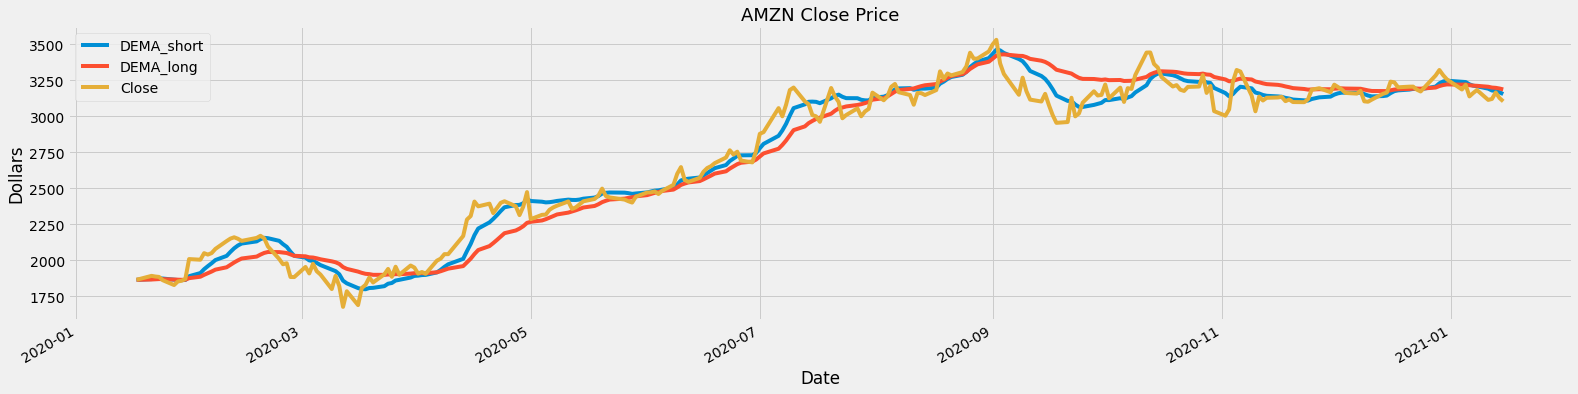

In [ ]:
#### plot the chart ######################
#create a list of column to keep 
column_list=['DEMA_short','DEMA_long','Close']
#to plot chart for three columns
df[column_list].plot(figsize=(24,6))
plt.title('AMZN Close Price',fontsize=18)
plt.ylabel('Dollars')
plt.xlabel('Date')
plt.show()

In [ ]:
###### create a function to buy and sell the stock (the trading strategy)###############################
def DEMA_strategy(data):
  #create a buy_list to store the price at which to buy, so buy_list equal to an empty list
  buy_list=[]
  sell_list=[]
  #create a flag to determine when the indicators cross
  flag=False

  #loop through the data set to check if cross above or below
  for i in range(0, len(data)):
    if data['DEMA_short'][i]> data['DEMA_long'][i] and flag==False:
      buy_list.append(data['Close'][i])  #add Close price at position i to the buy_list
      sell_list.append(np.nan)  #add NaN value to sell_list
      flag=True
    elif data['DEMA_short'][i]< data['DEMA_long'][i] and flag==True:
      sell_list.append(data['Close'][i])  #add Close price at position i to the sell_list
      buy_list.append(np.nan)  #add NaN value to buy_list
      flag=False
    else:
       buy_list.append(np.nan)
       sell_list.append(np.nan)

#store the buy and sell signals/lists into the data set, and add two columns to DataFrame
  data['Buy']=buy_list   #in the for loop to add the buy_list into 'Buy' column
  data['Sell']=sell_list  


In [ ]:
#run the strategy function to get the buy and sell signals
DEMA_strategy(df)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DEMA_short,DEMA_long,Buy,Sell
2020-01-17,2020-01-17,1885.890015,1886.640015,1857.250000,1864.719971,1864.719971,3997300,1864.719971,1864.719971,NaN,NaN
2020-01-21,2020-01-21,1865.000000,1894.270020,1860.000000,1892.000000,1892.000000,3707800,1869.668729,1866.817628,1892.0,NaN
2020-01-22,2020-01-22,1896.089966,1902.500000,1883.339966,1887.459961,1887.459961,3216300,1873.098715,1868.443616,NaN,NaN
2020-01-23,2020-01-23,1885.109985,1889.979980,1872.760010,1884.579956,1884.579956,2484600,1875.514291,1869.752368,NaN,NaN
2020-01-24,2020-01-24,1891.369995,1894.989990,1847.439941,1861.640015,1861.640015,3766200,1873.412456,1869.219356,NaN,NaN


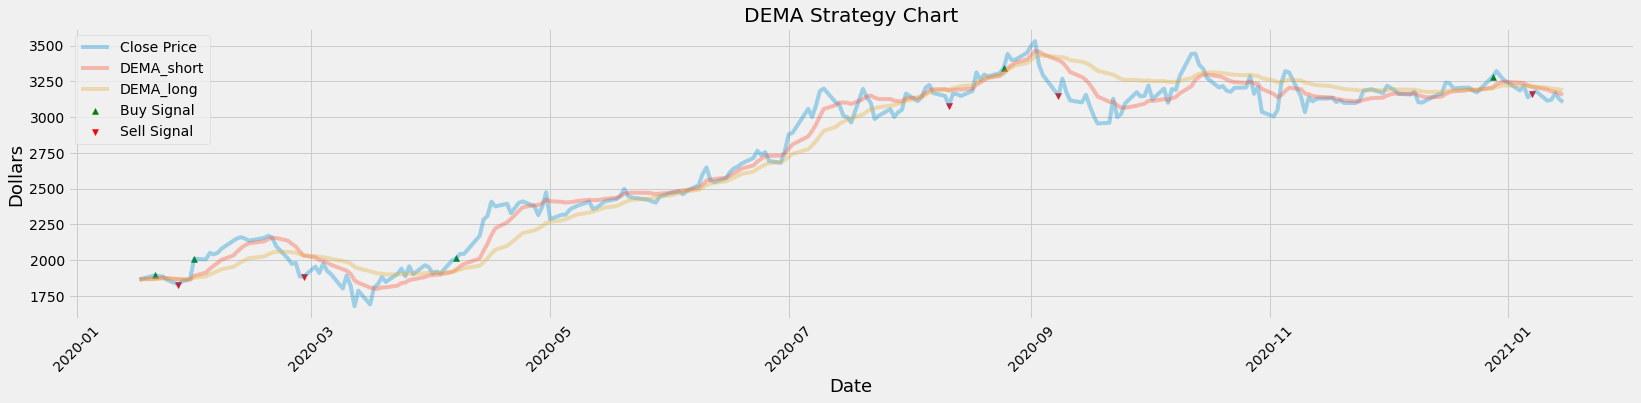

In [ ]:
################### visually show the stock buy and sell signals ###########################################
plt.figure(figsize=(25,5))
#set buy signals in the chart
plt.scatter(df.index,df['Buy'],color='green',label='Buy Signal',marker='^',alpha=1)
#set sell signals in the chart
plt.scatter(df.index,df['Sell'],color='red',label='Sell Signal',marker='v',alpha=1)

#plot the close price and short DEMA and long DEMA
plt.plot(df['Close'],label='Close Price',alpha=0.35)
plt.plot(df['DEMA_short'],label='DEMA_short',alpha=0.35)
plt.plot(df['DEMA_long'],label='DEMA_long',alpha=0.35)

#
plt.xticks(rotation=45)

plt.title('DEMA Strategy Chart')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Dollars',fontsize=18)
plt.legend(loc='upper left')

plt.show()
